#Regresión Lineal con SkLearn

In [ ]:
#Comenzamos importando las librerias requeridas para realizar el análisis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score

##Trabajo con el DataSet

In [ ]:
#Importamos el DataSet, se encuentra almacenado de manera local
df = pd.read_csv("dummyData.csv")
df.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
5,29.0,9.614382,1.027163,Mega,105.889148
6,55.0,24.893811,4.273602,Micro,198.679825
7,31.0,17.355042,2.289855,Nano,108.733932
8,76.0,24.648898,7.130116,Macro,270.189400
9,13.0,0.431128,2.229423,Mega,48.280582


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


###Tratamiento de datos nulos

In [ ]:
#Preguntamos cuáles son las columnas que contienen datos nulos
df.isnull().any()

TV               True
Radio            True
Social Media     True
Influencer      False
Sales            True
dtype: bool

In [ ]:
#Comprobar cuántos datos nulos existen en cada columna
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

Los datos nulos son muy pocos, por lo tanto es conveniente eliminarlos del dataset, pues no son significantes

In [ ]:
#Eliminamos los datos nulos
df.dropna(inplace=True)

In [ ]:
#Comprobamos cuantos datos nulos existen en las columnas
df.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

###Tratamiento de features

Podemos ver que en la columna Influencer se encuentran las categorías de Macro Mega Micro y Nano, se ve conveniente por categorizarlas con LabelEncoder

In [ ]:
#Saber qué categorías existen en la columna de Influencer
print(np.unique(df['Influencer']))
#Cantidad de categorías
print(len(np.unique(df['Influencer'])))

['Macro' 'Mega' 'Micro' 'Nano']
4


In [ ]:
#Usamos LabelEncoder para convertir los datos de la columna
gle = LabelEncoder()
df['Influencer'] = gle.fit_transform(df['Influencer'])
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,1,54.732757
1,13.0,9.237765,2.409567,1,46.677897
2,41.0,15.886446,2.913410,1,150.177829
3,83.0,30.020028,6.922304,1,298.246340
4,15.0,8.437408,1.405998,2,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,2,94.685866
4568,71.0,20.610685,6.545573,3,249.101915
4569,44.0,19.800072,5.096192,2,163.631457
4570,71.0,17.534640,1.940873,0,253.610411


In [ ]:
#Creación de un diccionario con el mapeo de indices y valores
genre_mappings = {k:v for k,v in enumerate(gle.classes_)}
genre_mappings

{0: 'Macro', 1: 'Mega', 2: 'Micro', 3: 'Nano'}

##Identificar la correlación entre los features

In [ ]:
#Identificamos la correlación
df.corr()

,TV,Radio,Social Media,Influencer,Sales
TV,1.000000,0.869158,0.527687,-0.013724,0.999497
Radio,0.869158,1.000000,0.606338,-0.010696,0.868638
Social Media,0.527687,0.606338,1.000000,-0.020689,0.527446
Influencer,-0.013724,-0.010696,-0.020689,1.000000,-0.014067
Sales,0.999497,0.868638,0.527446,-0.014067,1.000000


La mayor correlación existente se da entre el feature "TV" y "Sales".

Se debe aplicar la regresión a este feature

##Entrenamiento del modelo

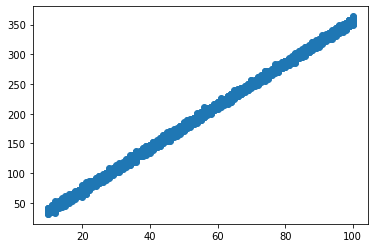

In [ ]:
#Tomamos los datos que necestiamos del dataframe
X = np.array(df['TV'])
y = np.array(df['Sales'])
plt.scatter(X,y)

In [ ]:
#Cambiamos los datos a vector columna porque inicialmente estaba como un vector fila
X = X.reshape(-1, 1)
X

array([[16.],
       [13.],
       [41.],
       ...,
       [44.],
       [71.],
       [42.]])

In [ ]:
#Generacion de los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
#Generación del modelo
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

##Análisis de los resultados

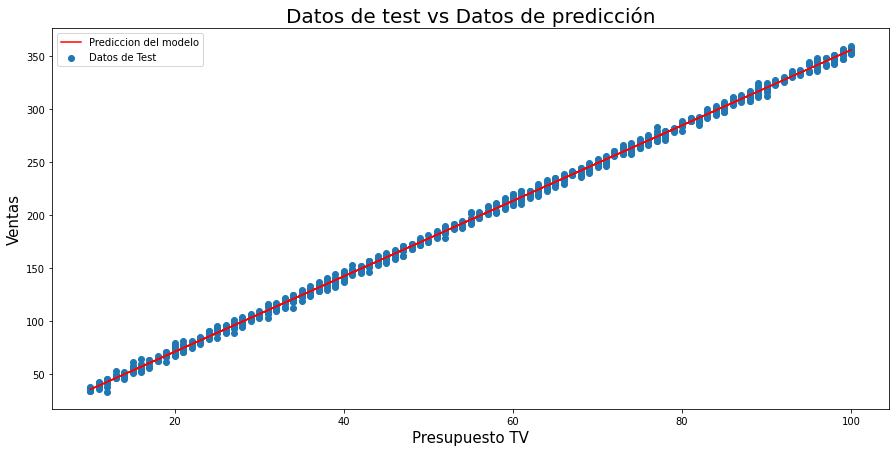

In [ ]:
plt.figure(figsize =(15,7))

#Graficando los datos
plt.scatter(X_test,y_test)
plt.plot(X_test,model.predict(X_test),color='red')

#Detalles esteticos del plot
plt.xlabel('Presupuesto TV',size=15)
plt.ylabel('Ventas',size=15)
plt.legend(['Prediccion del modelo','Datos de Test'])
plt.title('Datos de test vs Datos de predicción',size=20)
plt.show()

##Análisis de MSE y R2

In [ ]:
# Análisis R2
print(r2_score(y_test,model.predict(X_test)))
# Análisis MSE
print(mean_squared_error(y_test,model.predict(X_test),squared=True))

0.9990115565052095
8.313211608212859


Con los resultados obtenidos podemos concluir en que el modelo es bastante preciso, con una exactitud del 99%.
Sin embargo, también el modelo está muy cercano de tener un sobreajuste, lo cual puede que no sea conveniente